In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.pipeline import make_pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from keras import utils


In [2]:
# Read csv
df = pd.read_csv('commodity 2000-2022.csv')

In [3]:
df.describe()

,Open,High,Low,Close,Volume
count,29935.000000,29935.000000,29935.000000,29935.000000,2.993500e+04
mean,2199.912965,2217.497624,2183.193574,2200.980681,5.272722e+04
std,5054.172000,5088.374345,5024.451547,5054.979572,8.280148e+04
min,0.000000,0.000000,0.000000,1.482000,0.000000e+00
25%,48.075000,48.975000,47.265000,48.140000,1.000000e+00
50%,431.300000,435.500000,428.000000,431.400000,1.157100e+04
75%,1165.300000,1173.050000,1158.050000,1168.600000,7.218800e+04
max,81066.500000,86791.500000,81031.500000,81051.500000,1.083978e+06


In [4]:
df['Symbol'].unique()

array(['Gold', 'Palladium', 'Nickel', 'Brent Oil', 'Natural Gas',
       'US Wheat'], dtype=object)

In [5]:
# Replace string values into integers
# In integer values:
# Gold = 0, Palladium = 1, Nickel = 2, Brent Oil = 3, Natural Gas = 4 and US Wheat = 5
df = df.replace({'Gold': 0, 'Palladium': 1, 'Nickel': 2, 'Brent Oil': 3, 'Natural Gas': 4, 'US Wheat': 5})

C:\Users\vilil\AppData\Local\Temp\ipykernel_9648\363166622.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Gold': 0, 'Palladium': 1, 'Nickel': 2, 'Brent Oil': 3, 'Natural Gas': 4, 'US Wheat': 5})


In [6]:
df

,Symbol,Date,Open,High,Low,Close,Volume
0,0,2000-01-04,281.00,281.00,281.00,282.70,4
1,0,2000-01-05,283.20,283.20,283.20,281.10,16
2,0,2000-01-06,281.40,281.40,281.40,281.40,0
3,0,2000-01-07,281.90,281.90,281.90,281.90,0
4,0,2000-01-10,281.70,281.70,281.70,281.70,0
...,...,...,...,...,...,...,...
29930,5,2022-04-04,989.50,1014.50,984.75,1010.25,0
29931,5,2022-04-05,1020.50,1074.00,1020.00,1045.25,0
29932,5,2022-04-06,1049.40,1056.40,1024.25,1041.12,0
29933,5,2022-04-07,1040.25,1044.50,1017.75,1020.00,0


In [7]:
# convert the date column into a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# extract the day, month, and year components
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# show the modified data frame
print(df)

       Symbol       Date     Open     High      Low    Close  Volume  Day  \
0           0 2000-01-04   281.00   281.00   281.00   282.70       4    4   
1           0 2000-01-05   283.20   283.20   283.20   281.10      16    5   
2           0 2000-01-06   281.40   281.40   281.40   281.40       0    6   
3           0 2000-01-07   281.90   281.90   281.90   281.90       0    7   
4           0 2000-01-10   281.70   281.70   281.70   281.70       0   10   
...       ...        ...      ...      ...      ...      ...     ...  ...   
29930       5 2022-04-04   989.50  1014.50   984.75  1010.25       0    4   
29931       5 2022-04-05  1020.50  1074.00  1020.00  1045.25       0    5   
29932       5 2022-04-06  1049.40  1056.40  1024.25  1041.12       0    6   
29933       5 2022-04-07  1040.25  1044.50  1017.75  1020.00       0    7   
29934       5 2022-04-08  1020.00  1054.25  1017.00  1051.50       0    8   

       Month  Year  
0          1  2000  
1          1  2000  
2          1

In [8]:
# drop unneccesary "Date" because now on we'll use it in day, month and year sections
df = df.drop('Date', axis=1)

print(df)

       Symbol     Open     High      Low    Close  Volume  Day  Month  Year
0           0   281.00   281.00   281.00   282.70       4    4      1  2000
1           0   283.20   283.20   283.20   281.10      16    5      1  2000
2           0   281.40   281.40   281.40   281.40       0    6      1  2000
3           0   281.90   281.90   281.90   281.90       0    7      1  2000
4           0   281.70   281.70   281.70   281.70       0   10      1  2000
...       ...      ...      ...      ...      ...     ...  ...    ...   ...
29930       5   989.50  1014.50   984.75  1010.25       0    4      4  2022
29931       5  1020.50  1074.00  1020.00  1045.25       0    5      4  2022
29932       5  1049.40  1056.40  1024.25  1041.12       0    6      4  2022
29933       5  1040.25  1044.50  1017.75  1020.00       0    7      4  2022
29934       5  1020.00  1054.25  1017.00  1051.50       0    8      4  2022

[29935 rows x 9 columns]


In [9]:
# if you  have more than one independent variables, list them all here
# leave out the target variable! (dependent variable)
#X = df[['Symbol', 'Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Volume']]

# have only the target variable here (dependent variable)
#y = df['Close']

In [10]:
# a common trick in X/y -split
# X = everything else in the DataFrame minus the target variable
# y = only the target variable
X = df.drop('Symbol', axis=1)
y = df['Symbol']

In [11]:
df

,Symbol,Open,High,Low,Close,Volume,Day,Month,Year
0,0,281.00,281.00,281.00,282.70,4,4,1,2000
1,0,283.20,283.20,283.20,281.10,16,5,1,2000
2,0,281.40,281.40,281.40,281.40,0,6,1,2000
3,0,281.90,281.90,281.90,281.90,0,7,1,2000
4,0,281.70,281.70,281.70,281.70,0,10,1,2000
...,...,...,...,...,...,...,...,...,...
29930,5,989.50,1014.50,984.75,1010.25,0,4,4,2022
29931,5,1020.50,1074.00,1020.00,1045.25,0,5,4,2022
29932,5,1049.40,1056.40,1024.25,1041.12,0,6,4,2022
29933,5,1040.25,1044.50,1017.75,1020.00,0,7,4,2022


In [12]:
# version 1, SciPy, extreme outliers that go under -3 or over +3 in normal distribution
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

# version 2, use quantiles
 #this removes top 10% and bottom 10% from the distribution (extreme values)
 #price is used as the variable. you can also use this for other variables, like area
#df_middle= df.query('Close >= Close.quantile(q=0.40) and Close < Close.quantile(q=0.60)')

In [13]:
# Check if values have changed due to getting rid of the outliers
df.describe()

,Symbol,Open,High,Low,Close,Volume,Day,Month,Year
count,28204.000000,28204.000000,28204.000000,28204.000000,28204.000000,28204.000000,28204.000000,28204.000000,28204.000000
mean,2.669692,1503.596308,1519.025732,1488.693267,1504.669178,47855.838214,15.792193,6.505283,2011.584598
std,1.823243,3483.430196,3520.506606,3448.694922,3484.538411,69921.067960,8.785399,3.450257,6.255584
min,0.000000,0.000000,0.000000,0.000000,1.482000,0.000000,1.000000,1.000000,2000.000000
25%,1.000000,42.550000,43.395000,41.600000,42.715000,3.000000,8.000000,3.000000,2007.000000
50%,3.000000,420.225000,423.225000,417.000000,420.225000,11628.500000,16.000000,7.000000,2012.000000
75%,4.000000,939.025000,947.825000,931.075000,938.275000,69478.500000,23.000000,10.000000,2017.000000
max,5.000000,17351.000000,17475.000000,17241.000000,17357.000000,301107.000000,31.000000,12.000000,2022.000000


In [14]:
df

,Symbol,Open,High,Low,Close,Volume,Day,Month,Year
0,0,281.00,281.00,281.00,282.70,4,4,1,2000
1,0,283.20,283.20,283.20,281.10,16,5,1,2000
2,0,281.40,281.40,281.40,281.40,0,6,1,2000
3,0,281.90,281.90,281.90,281.90,0,7,1,2000
4,0,281.70,281.70,281.70,281.70,0,10,1,2000
...,...,...,...,...,...,...,...,...,...
29930,5,989.50,1014.50,984.75,1010.25,0,4,4,2022
29931,5,1020.50,1074.00,1020.00,1045.25,0,5,4,2022
29932,5,1049.40,1056.40,1024.25,1041.12,0,6,4,2022
29933,5,1040.25,1044.50,1017.75,1020.00,0,7,4,2022


In [15]:
# Find all the missing values
df.isnull().sum()

Symbol    0
Open      0
High      0
Low       0
Close     0
Volume    0
Day       0
Month     0
Year      0
dtype: int64

In [16]:
# Check if any duplicates
df.duplicated().sum()

0

In [17]:
# REMEMBER TO SCALE THE TARGET VARIABLE (y)
# WITH MINMAXSCALER BEFORE DOING THE X/y -split

# initalize scaler
scalerY = MinMaxScaler()

# name of target variable
target_variable = "Symbol"

# save min/max -values of target value
# for bettermetrics later
min_y = df[target_variable].min()
max_y = df[target_variable].max()

# scale y-variable
num_vars = [target_variable]
df[num_vars] = scalerY.fit_transform(df[num_vars])

C:\Users\vilil\AppData\Local\Temp\ipykernel_9648\2286891684.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_vars] = scalerY.fit_transform(df[num_vars])


In [18]:
# create train and test sets of your dataset
# random_state is optional, you can lock this down in order to 
# to get same results always
# this examples reserves 30% for test data, 70% for training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) #, random_state=101)

In [19]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y = encoder.transform(y_train)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = utils.to_categorical(encoded_y)

In [20]:
df

,Symbol,Open,High,Low,Close,Volume,Day,Month,Year
0,0.0,281.00,281.00,281.00,282.70,4,4,1,2000
1,0.0,283.20,283.20,283.20,281.10,16,5,1,2000
2,0.0,281.40,281.40,281.40,281.40,0,6,1,2000
3,0.0,281.90,281.90,281.90,281.90,0,7,1,2000
4,0.0,281.70,281.70,281.70,281.70,0,10,1,2000
...,...,...,...,...,...,...,...,...,...
29930,1.0,989.50,1014.50,984.75,1010.25,0,4,4,2022
29931,1.0,1020.50,1074.00,1020.00,1045.25,0,5,4,2022
29932,1.0,1049.40,1056.40,1024.25,1041.12,0,6,4,2022
29933,1.0,1040.25,1044.50,1017.75,1020.00,0,7,4,2022


In [21]:
# create an empty linear regression model
# and fit it with out data 
model = make_pipeline(StandardScaler(), svm.SVC(probability=True))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(probability=True))])

In [22]:
# make test predictions with new data with our model
predictions = model.predict(X_test)

In [23]:
 # print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1425
           1       0.51      0.76      0.61       867
           2       1.00      1.00      1.00       835
           3       0.74      0.75      0.74      1434
           4       0.75      0.73      0.74      1439
           5       0.90      0.64      0.75      1484

    accuracy                           0.76      7484
   macro avg       0.78      0.78      0.77      7484
weighted avg       0.79      0.76      0.77      7484


Model overall accuracy: 76.47%


In [24]:
labels = ['Gold', 'Palladium', 'Nickel', 'Brent Oil', 'Natural Gas', 'US Wheat']

[[1155  252    0    0    0   18]
 [ 123  657    0    0    0   87]
 [   0    0  835    0    0    0]
 [   0    1    0 1073  360    0]
 [   5    4    0  373 1057    0]
 [ 170  366    0    2    0  946]]




<Axes: >

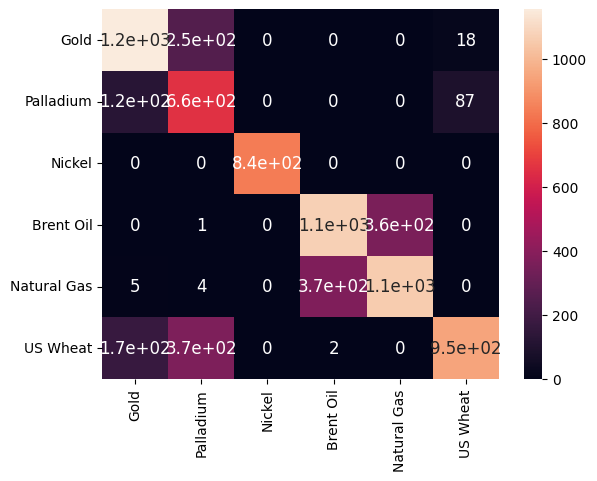

In [25]:
print(confusion_matrix(y_test, predictions))
print("\n")

# use seaborn to make a nicer confusion matrix
cm_array = confusion_matrix(y_test, predictions)
cm_array_df = pd.DataFrame(cm_array, index=labels, columns=labels)
sns.heatmap(cm_array_df, annot=True, annot_kws={"size": 12}) 

In [26]:
df.describe()

,Symbol,Open,High,Low,Close,Volume,Day,Month,Year
count,28204.000000,28204.000000,28204.000000,28204.000000,28204.000000,28204.000000,28204.000000,28204.000000,28204.000000
mean,0.533938,1503.596308,1519.025732,1488.693267,1504.669178,47855.838214,15.792193,6.505283,2011.584598
std,0.364649,3483.430196,3520.506606,3448.694922,3484.538411,69921.067960,8.785399,3.450257,6.255584
min,0.000000,0.000000,0.000000,0.000000,1.482000,0.000000,1.000000,1.000000,2000.000000
25%,0.200000,42.550000,43.395000,41.600000,42.715000,3.000000,8.000000,3.000000,2007.000000
50%,0.600000,420.225000,423.225000,417.000000,420.225000,11628.500000,16.000000,7.000000,2012.000000
75%,0.800000,939.025000,947.825000,931.075000,938.275000,69478.500000,23.000000,10.000000,2017.000000
max,1.000000,17351.000000,17475.000000,17241.000000,17357.000000,301107.000000,31.000000,12.000000,2022.000000


In [27]:
# Create tester row to test your model
tester_row = {
    'Open': 3483,
    'High': 3520,
    'Low': 3448,
    'Close': 3484,
    'Volume': 69921,
    'Day': 3,
    'Month': 3,
    'Year': 12
}

# create a pandas DataFrame
tester_row = pd.DataFrame([tester_row])

# probabilities by all categories
print("All probabilities by category:")
print(model.predict_proba(tester_row))
print()

# change these based on your original data
# this is a nice thing in SVM ->
# you get actual category names as output instead
# index integers
print("Predicted category:")
result = model.predict(tester_row)[0]
print(result)
print("-------------------")

All probabilities by category:
[[0.04888067 0.00641886 0.54006366 0.13769819 0.04348665 0.22345196]]

Predicted category:
2
-------------------
